In [165]:
import cv2 as cv 
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [166]:
import sklearn
from sklearn import preprocessing

In [167]:
import csv
import itertools

with open('/content/drive/MyDrive/X_train.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(","," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('/content/drive/MyDrive/X_train.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('0'))
        for group in grouped:
            writer.writerows(group)

In [168]:
import csv
import itertools

with open('/content/drive/MyDrive/y_train.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(","," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('/content/drive/MyDrive/y_train.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('1'))
        for group in grouped:
            writer.writerows(group)

In [169]:
data_train_X = pd.read_csv("/content/drive/MyDrive/X_train.csv") 
df_train_X=pd.DataFrame(data_train_X)
df_train_X=np.array(df_train_X)

In [170]:
data_train_y = pd.read_csv("/content/drive/MyDrive/y_train.csv") 
df_train_y=pd.DataFrame(data_train_y)
df_train_y=np.array(df_train_y)

In [248]:
train_x_flatten = df_train_X.reshape(df_train_X.shape[0], -1).T
train_X = train_x_flatten/255
#normalized_train_X = preprocessing.normalize(train_x_flatten)
#print ("norlamized_train_X's shape: " + str(normalized_train_X.shape))

In [249]:
train_y_flatten = df_train_y.reshape(df_train_y.shape[0], -1)
train_y = train_y_flatten/255
#normalized_train_y = preprocessing.normalize(train_y_flatten)
#print ("normalized_train_y's shape: " + str(normalized_train_y.shape))

In [250]:
train_X=train_x_flatten
train_y=train_y_flatten
#plt.plot(train_X.T, train_y)
#for i in range(len(train_y)):
#  if train_y[i] == -1:
#    train_y[i]=0
#  else:
#    train_y[i]=1
#plt.plot(train_X.T, train_y)

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

In [252]:
import numpy as np
import h5py

np.random.seed(1)

In [253]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(1)
    
    ### START CODE HERE ### (~4 lines of code)
    #W1 = np.random.randn(n_x, n_h) * np.sqrt(0.0003/n_x)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    #W2 = np.random.randn(n_h, n_y) * np.sqrt(0.0003/n_h)
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1, "W2": W2,
                  "b1": b1, "b2": b2}
    
    return parameters    

In [254]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert (parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert (parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [255]:
#EXERCISE 3
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):

    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert (Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [256]:
# GRADED FUNCTIONS: Sigmoid, relu, linear_activation_forward

def sigmoid(Z):

    ### START CODE HERE ### (~1 lines of code)
    A = 1.0 / (1 + np.exp(-Z))
    ### END CODE HERE ###
    cache = Z
    
    return A, cache


def relu(Z):

    ### START CODE HERE ### (~1 lines of code)
    A = np.maximum(0, Z)
    ### END CODE HERE ###
    assert (A.shape == Z.shape)
    
    cache = Z 
    return A, cache


# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
  
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [257]:
#EXERCISE 5
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache =linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
#    assert (AL.shape == (1,X.shape[1]))
            
    return AL

In [258]:
#EXERCISE 6
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):

    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1 / m *(np.dot(Y,np.log(AL.T)) + np.dot(1 - Y,np.log(1 - AL).T))
    ### END CODE HERE ###
    
    cost = np.sum(np.squeeze(cost))/m    # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert (cost.shape == ())
    
    return cost


In [259]:
#EXERCISE 7
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1 / m * (np.dot(dZ,A_prev.T))
    db = 1 / m * (np.sum(dZ,axis = 1,keepdims = True))
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [260]:
#EXERCISE 8
def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ


def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    np.reshape(dA.T,(1,np.product(dA.shape)))
    np.reshape(s,(1,np.product(s.shape)))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ





# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    elif activation == "linear":
      dA_prev, dW, db = linear_backward(dZ,linear_cache)
      
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db


In [261]:
#EXERCISE 9
# GRADED FUNCTION: L_model_backward
def L_model_backward(AL, Y, caches):
  
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp =linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "linear")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads



In [262]:
#EXERCISE 10
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+ str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db"+ str(l+1)]
    ### END CODE HERE ###
        
    return parameters


In [263]:
len(np.transpose(train_X))

60

In [264]:
n_x = 60    # num_px * num_px * 3
n_h = 2
n_y = 60
layers_dims = (n_x, n_h, n_y)

In [265]:
def two_layer_model(X, Y, layers_dims, learning_rate =0.01, num_iterations=3000 , print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
           # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



Cost after iteration 0: 2495.3298500158025
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in true_divide


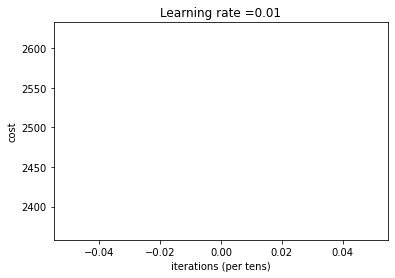

In [266]:
parameters = two_layer_model(np.transpose(train_X), train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 1100, print_cost=True)

In [267]:
##CONCLUSION
def predict(X, y, parameters):
 

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
 
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print(results)
    print("predictions: " + str(p))
    print("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


In [268]:
W1=parameters["W1"]
W2=parameters["W2"]
b1=parameters["b1"]
b2=parameters["b2"]

nan

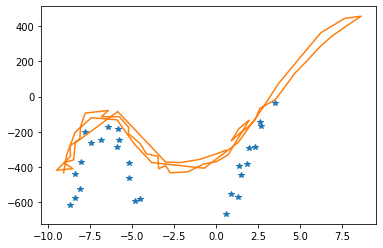

In [269]:
Z1=np.dot(W1,np.transpose(train_X)) + b1
Z1.shape
#W2.shape
X=np.transpose(train_X)
y=train_y
Z2=np.dot(W2,Z1) +  b2
plt.plot(X, Z2+3,'*')
plt.plot(X,y*5)
error=np.sum(Z2-y)/len(y)
Accuracy=1-error/100
Accuracy

In [270]:
caches = []
A = np.transpose(train_X)
L = len(parameters) // 2                 

for l in range(1, L):
   
  A_prev = A 
  A, cache = linear_forward(A_prev,parameters['W' + str(l)] ,parameters['b' + str(l)])#linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
  caches.append(cache)

AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid")
caches.append(cache)

In [271]:
#error rate
MSE=np.sum((AL-train_y)**2)/len(train_y)
MSE

nan

In [272]:
parameters['W1'].shape
A_prev.shape

(60, 1)

In [273]:
A = np.transpose(train_X)
L = len(parameters) // 2     
A_prev=A
A,cache= linear_forward(A_prev,W1 ,b1)#linear_activation_forward(A_prev, parameters['W1'], parameters['b1'], activation = "relu")
caches.append(cache)
AL,cache= linear_activation_forward(A, parameters['W2'],parameters['b2'], activation = "sigmoid")
caches.append(cache)


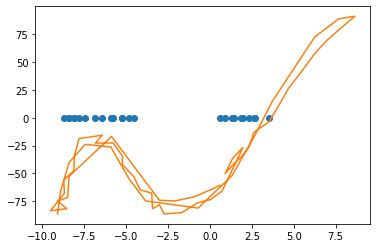

In [274]:
plt.plot(X, AL,'o')
plt.plot(X,y)

In [275]:
import csv
import itertools

with open('/content/drive/MyDrive/X_test.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(","," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('/content/drive/MyDrive/X_test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('0'))
        for group in grouped:
            writer.writerows(group)

In [276]:
import csv
import itertools

with open('/content/drive/MyDrive/y_test.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(","," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('/content/drive/MyDrive/y_test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('0'))
        for group in grouped:
            writer.writerows(group)

In [277]:
data_test_X = pd.read_csv("/content/drive/MyDrive/X_test.csv") 
df_test_X=pd.DataFrame(data_test_X)
df_test_X=np.array(df_test_X)

In [278]:
data_test_y = pd.read_csv("/content/drive/MyDrive/y_test.csv") 
df_test_y=pd.DataFrame(data_test_y)
df_test_y=np.array(df_test_y)

In [279]:
test_x_flatten = df_test_X.reshape(df_test_X.shape[0], -1)
test_X = test_x_flatten/255

print ("test_X's shape: " + str(test_X.shape))

test_X's shape: (41, 1)


In [280]:
test_y_flatten = df_test_y.reshape(df_test_y.shape[0], -1)
test_y = test_y_flatten/255

print ("test_y's shape: " + str(test_y.shape))

test_y's shape: (41, 1)


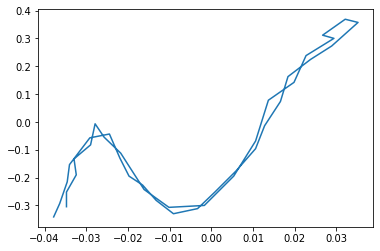

In [281]:
plt.plot(test_X,test_y)

In [282]:
W1=parameters['W1']

In [283]:
caches = []
A = test_X
L = len(parameters) // 2                  # number of layers in the neural network


   
A_prev = A 
A, cache = linear_activation_forward(A_prev, parameters['W1'], parameters['b1'][0:40], activation = "relu")
caches.append(cache)

AL, cache = linear_activation_forward(A, parameters['W2'],parameters['b2'], activation = "sigmoid")
caches.append(cache)

ValueError: ignored